# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Load the data

In [3]:
from google.colab import files
uploaded = files.upload("")

Saving artists.csv to artists.csv
Saving tracks.csv to tracks.csv


In [4]:
artists = pd.read_csv("artists.csv")
tracks = pd.read_csv("tracks.csv")


In [5]:
artists.head()
tracks.head()


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


# Clean the data

In [6]:
artists = artists.dropna()
tracks = tracks.dropna()


In [7]:
artists = artists.drop_duplicates()
tracks = tracks.drop_duplicates()


In [8]:
artists.columns
tracks.columns


Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [13]:
df[['popularity_track', 'energy', 'loudness', 'acousticness', 'duration_ms']].corr()

,popularity_track,energy,loudness,acousticness,duration_ms
popularity_track,1.000000,0.312328,0.335889,-0.383446,0.036428
energy,0.312328,1.000000,0.766539,-0.716359,0.023277
loudness,0.335889,0.766539,1.000000,-0.521142,-0.000457
acousticness,-0.383446,-0.716359,-0.521142,1.000000,-0.064260
duration_ms,0.036428,0.023277,-0.000457,-0.064260,1.000000


#Visualizations

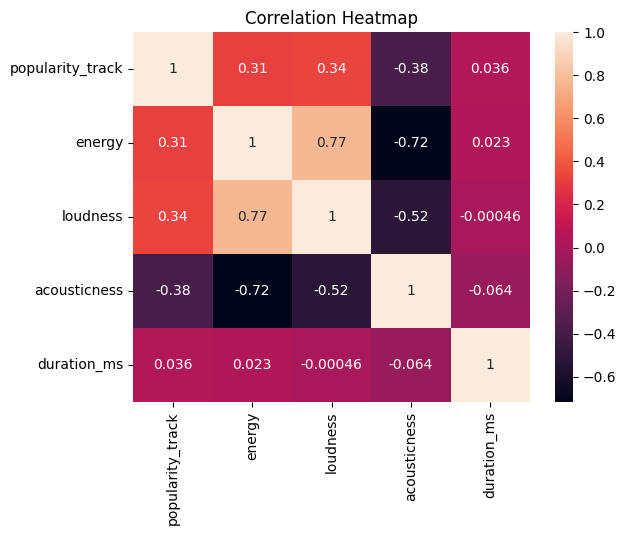

In [15]:
sns.heatmap(
    df[['popularity_track', 'energy', 'loudness', 'acousticness', 'duration_ms']].corr(),
    annot=True
)
plt.title("Correlation Heatmap")
plt.show()

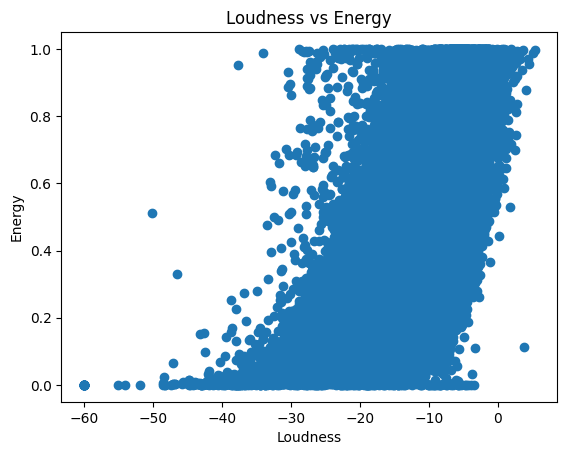

In [16]:
plt.scatter(df['loudness'], df['energy'])
plt.xlabel("Loudness")
plt.ylabel("Energy")
plt.title("Loudness vs Energy")
plt.show()


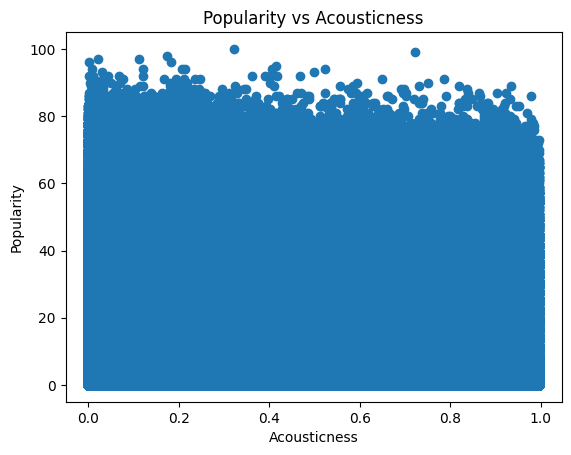

In [18]:
plt.scatter(df['acousticness'], df['popularity_track'])
plt.xlabel("Acousticness")
plt.ylabel("Popularity")
plt.title("Popularity vs Acousticness")
plt.show()

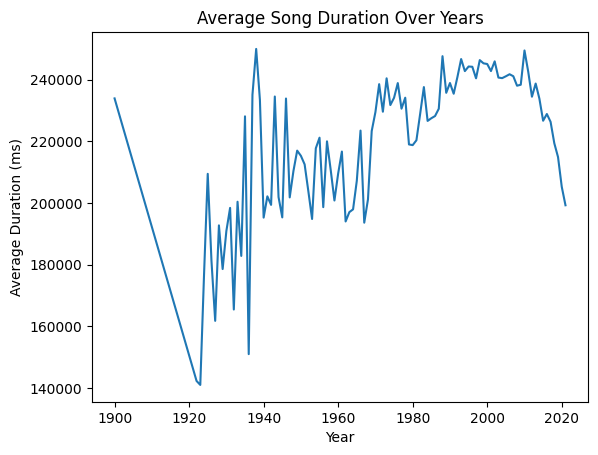

In [22]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year
yearly = df.groupby('release_year')['duration_ms'].mean()

plt.plot(yearly.index, yearly.values)
plt.xlabel("Year")
plt.ylabel("Average Duration (ms)")
plt.title("Average Song Duration Over Years")
plt.show()

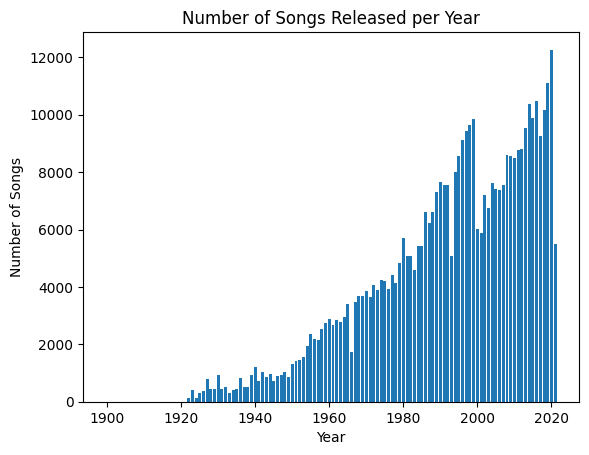

In [23]:
songs_per_year = df['release_year'].value_counts().sort_index()

plt.bar(songs_per_year.index, songs_per_year.values)
plt.xlabel("Year")
plt.ylabel("Number of Songs")
plt.title("Number of Songs Released per Year")
plt.show()
